# Project: Analysis of TMDB Movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 
>__In this report we are going to analyze tmdb dataset to answer interesting questions and get some insights about movies.__     
__I love watching movies and i am curious to find out more about movies industry.__   
__This dataset has 10866 rows and 21 columns. Fortunately, it seems that there is a lot to explore.__


> __I am intersted in finding an answer to these questions :__
>>1. Is popularity associated with number of ratings?
1. What are the top ten Movie genres that have the highest Revenue?
1. Do people become more intersted in movies over years? From both Production and viewer point of views.
1. What are the top ten directors that have highest ratings and popularity?
1. What are the Most Popular five movies?
1. What is the month at which movies are usually released?

> __Let's First get familiar with the dataset and do some cleaning if needed, then find the answers.__

In [1]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify
import matplotlib
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#Load the data set 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#find some informtin about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#Check some statistics about data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#Checking for duplicates
df.duplicated().sum()

1

### Issues with the data
- unwanted columns 
- zeros in budget, revenue , runtime , budget_adj , revenue_adj
- null values in cast , geners , production  companies and director
- runtime has outliers some for tv series and few for documentary movies
- scientific notations used.
- Duplicated Row

### Drop unwanted columns

In [6]:
#Let's drop columns that won't be used in analysis
df.drop(columns=['id' , 'imdb_id', 'homepage' , 'tagline' , 'keywords' , 'overview'  ] , inplace=True)

### Replace zeros with np.nan

In [7]:
#replace zeros with np.nan 
cols=['budget' , 'revenue' , 'revenue_adj' , 'revenue_adj']
for col in cols :
    df[col].replace(0,np.nan, inplace=True)

### Check runtime outliers

In [8]:
df[(df['runtime']== 235) | (df['runtime']==900)] 
#I googled that movies names and the runtime is right.
#Let's check the runtime of documentary movies

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,NaN,NaN,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,NaN
4164,0.090605,NaN,NaN,The Century of the Self,Martin Bergmann|Ann Bernays|Edward Bernays|Ann...,Adam Curtis,235,Documentary,British Broadcasting Corporation (BBC)|RDF Media,3/17/02,14,8.3,2002,0.0,NaN


In [9]:
doc_df=df[df['genres']=='Documentary']
doc_df
#It seems that Documentary genre has a lot of null budget and revenue values and extreme runtime.
#so we can exclude it from the analysis.

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
241,0.532239,NaN,NaN,Hot Girls Wanted,Rachel Bernard|Belle Knox|Tressa Silguero|Kend...,Jill Bauer|Ronna Gradus,84,Documentary,Two to Tangle Productions,5/29/15,158,5.9,2015,0.000000,NaN
290,0.427116,NaN,NaN,Where to Invade Next,Michael Moore|Krista Kiuru|Tim Walker,Michael Moore,120,Documentary,Dog Eat Dog Films|IMG Films,12/23/15,67,7.2,2015,0.000000,NaN
334,0.357654,NaN,NaN,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000,NaN
335,0.357614,NaN,NaN,Going Clear: Scientology and the Prison of Belief,Paul Haggis|Jason Beghe|Alex Gibney|Lawrence W...,Alex Gibney,119,Documentary,Jigsaw Productions|HBO Documentary Films|Sky A...,1/25/15,186,7.8,2015,0.000000,NaN
346,0.574031,NaN,494506.0,Steve Jobs: The Man in the Machine,Bob Belleville|Chrisann Brennan|Nolan Bushnell...,Alex Gibney,129,Documentary,Magnolia Pictures|Jigsaw Productions|CNN Films,8/7/15,110,6.2,2015,0.000000,4.549453e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10093,0.142836,500000.0,3779620.0,Paris is Burning,Dorian Corey|Pepper LaBeija|Willi Ninja|Octavi...,Jennie Livingston,71,Documentary,NaN,3/13/90,27,7.6,1990,834449.270157,6.307802e+06
10386,0.118854,NaN,NaN,The Making of 'The Nightmare Before Christmas',Mike Belzer|Tim Burton|Bonita DeCarlo|Greg Dyk...,NaN,25,Documentary,Buena Vista Home Entertainment,10/3/93,15,7.5,1993,0.000000,NaN
10634,0.021941,NaN,NaN,VÃ©ritÃ©s et Mensonges,Orson Welles|Joseph Cotten|Oja Kodar|Elmyr de ...,Orson Welles,89,Documentary,Janus Films|SACI,3/13/73,31,7.0,1973,0.000000,NaN
10806,0.138635,NaN,NaN,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,85,Documentary,NaN,10/1/78,12,5.9,1978,0.000000,NaN


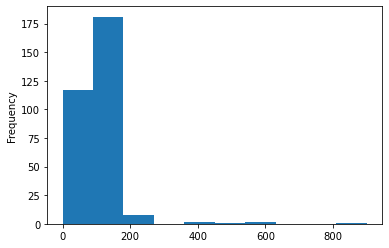

In [10]:
doc_df.runtime.plot(kind='hist');
#check visually how runtime values are distributed

In [11]:
df=df[df.genres!='Documentary']
#exclude documentary genres from the dataset

In [12]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10554.000000,5.135000e+03,4.793000e+03,10554.000000,10554.000000,10554.000000,10554.000000,1.055400e+04,4.793000e+03
mean,0.660165,3.093128e+07,9.017635e+07,101.996778,222.810025,5.947660,2001.087076,1.806063e+07,1.163307e+08
std,1.011240,3.896177e+07,1.627730e+08,29.259767,583.141542,0.925481,12.866277,3.467819e+07,1.996688e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,2.370705e+00
25%,0.214587,6.000000e+06,8.059140e+06,90.000000,17.000000,5.400000,1994.000000,0.000000e+00,1.108757e+07
50%,0.392051,1.800000e+07,3.247412e+07,99.000000,40.000000,6.000000,2005.000000,0.000000e+00,4.499107e+07
75%,0.730048,4.000000e+07,1.005232e+08,112.000000,152.000000,6.600000,2011.000000,2.188458e+07,1.334576e+08
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.800000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
df[df['runtime']>300].sample(4)
#It looks like most long runtimes are for tvseries

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3886,0.044221,20000000.0,NaN,Mildred Pierce,Kate Winslet|Evan Rachel Wood|Guy Pearce|Mare ...,Todd Haynes,336,Drama,Home Box Office (HBO)|Metro-Goldwyn-Mayer (MGM),3/27/11,21,6.6,2011,1.938796e+07,NaN
3356,0.136540,NaN,NaN,John Adams,Paul Giamatti|Laura Linney|Stephen Dillane|Tom...,Tom Hooper,501,History|Drama,NaN,3/16/08,33,6.6,2008,0.000000e+00,NaN
4198,1.180484,28000000.0,NaN,The Stand,Gary Sinise|Molly Ringwald|Jamey Sheridan|Ruby...,Mick Garris,366,Adventure|Drama|Fantasy|Horror,Laurel Entertainment|Greengrass Productions,1/1/94,63,6.7,1994,4.119112e+07,NaN
6181,0.000065,NaN,NaN,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,561,Drama|History|Western,NaN,11/3/85,17,6.0,1985,0.000000e+00,NaN


### Suppress Scientific notation 

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [15]:
df.describe()
#check if it works well

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10554.000,5135.000,4793.000,10554.000,10554.000,10554.000,10554.000,10554.000,4793.000
mean,0.660,30931279.598,90176350.571,101.997,222.810,5.948,2001.087,18060629.225,116330699.583
std,1.011,38961771.512,162773042.385,29.260,583.142,0.925,12.866,34678187.753,199668792.913
min,0.000,1.000,2.000,0.000,10.000,1.500,1960.000,0.000,2.371
25%,0.215,6000000.000,8059140.000,90.000,17.000,5.400,1994.000,0.000,11087569.000
50%,0.392,18000000.000,32474120.000,99.000,40.000,6.000,2005.000,0.000,44991072.114
75%,0.730,40000000.000,100523181.000,112.000,152.000,6.600,2011.000,21884583.624,133457615.922
max,32.986,425000000.000,2781505847.000,877.000,9767.000,8.800,2015.000,425000000.000,2827123750.412


### Remove duplicates

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1: Is popularity associated with number of ratings?

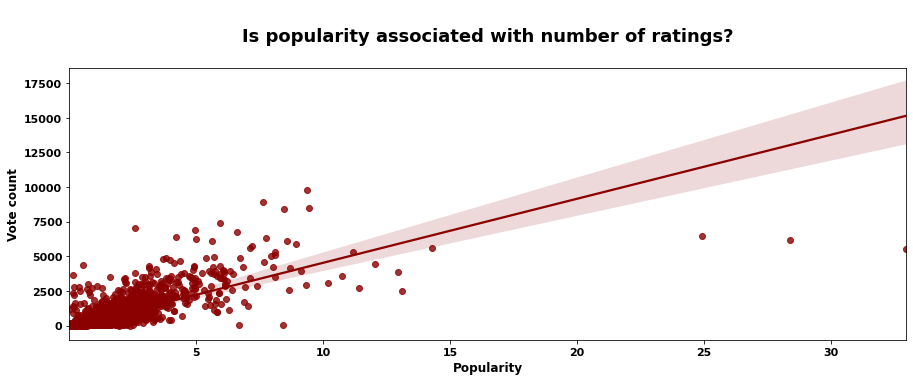

In [18]:
#Plotting popularity versus Vote counts in a scatter plot in a dark red colour
plt.subplots(figsize=(15,5))
sns.regplot(data=df , x= 'popularity'  , y= 'vote_count' , color='darkred');
plt.xlabel('Popularity' , fontweight='bold' , fontsize=12 );
plt.ylabel('Vote count' , fontweight='bold' , fontsize=12 );
plt.title('\nIs popularity associated with number of ratings?\n' , fontsize=18 , fontweight='bold'  );
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');

__As shown above, There is a positive correlation between Vote counts and Popularity, which means that:__

 __Yes, Higher popularity leads to higher vote counts.__

### Question 2: What are the top ten Movie genres that have the highest Revenue?

In [19]:
#making a copy of the original dataframe
clean_df=df.copy()

In [20]:
#splitting genres each one in a row
clean_df['genres']=clean_df.genres.str.split('|')
genres_df=clean_df.explode('genres')

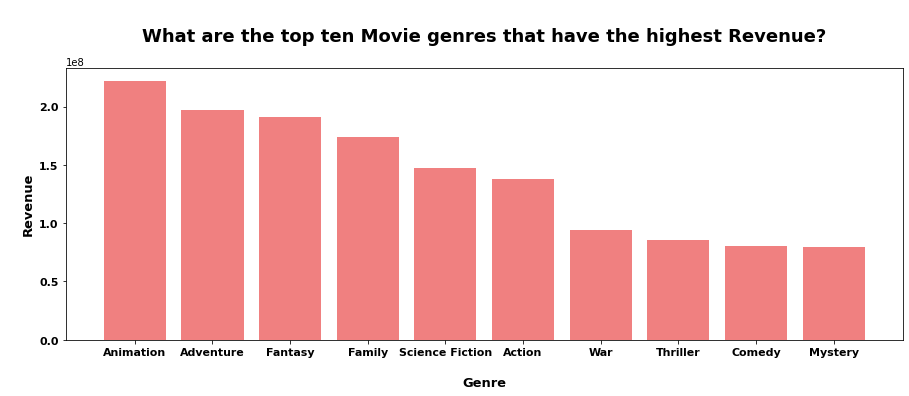

In [21]:
#Plotting Top ten movie genres that have the highest average revenue 
topten=genres_df.groupby('genres')['revenue'].mean().nlargest(10)
plt.subplots(figsize=(15,5));
plt.bar(topten.index,topten.values, color='lightcoral');
plt.title('\nWhat are the top ten Movie genres that have the highest Revenue?\n',fontsize=18,fontweight='bold');
plt.xlabel('\nGenre'  , fontsize=13  ,fontweight='bold');
plt.ylabel('\nRevenue' , fontsize=13  ,fontweight='bold');
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');

__Top ten movie genres that has the highest revenue are :__   
> __Animation, Adventure, Fantasy, Family, Science Fiction, Action, War, Thriller, Comedy and Mystery__

### Question 3: Does people become more intersted in movies over years?
### From both Production and viewer point of views.

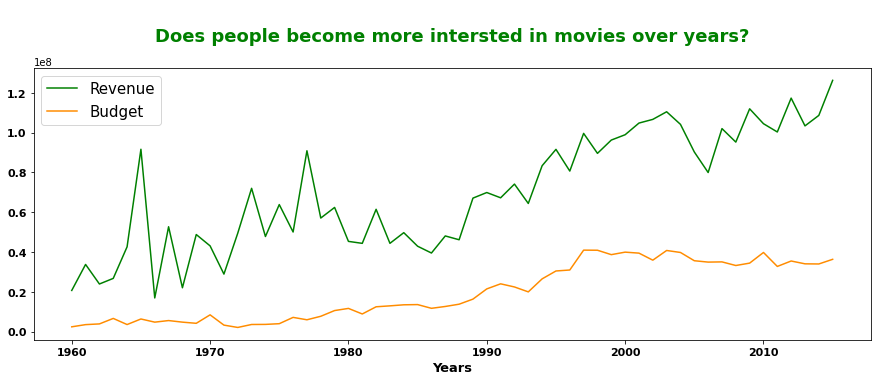

In [22]:
revenue=df.groupby('release_year')['revenue'].mean()
budget=df.groupby('release_year')['budget'].mean()
plt.subplots(figsize=(15,5));
plt.plot(revenue.index,revenue.values, color='g' , label='Revenue');
plt.plot(budget.index,budget.values, color='darkorange' , label='Budget');
plt.title('\nDoes people become more intersted in movies over years?\n',color='g',fontsize=18,fontweight='bold');
plt.xlabel('Years'  , fontsize=13 ,fontweight='bold');
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.legend(fontsize=15);

__Over years, Revenue is increasing which means people spend more money on movies.__ 

__Budget increase is an indication of higher interset in Filmmaking.__

> This result isn't 100% accurate due to missing values in budget and revenue columns.

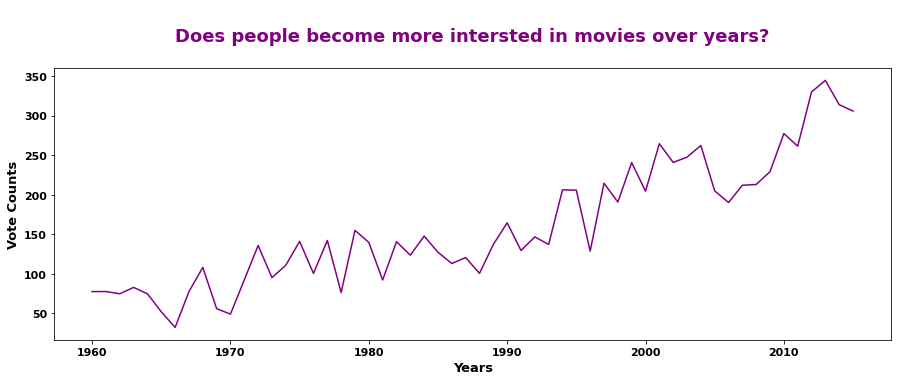

In [23]:
vote=df.groupby('release_year')['vote_count'].mean()
plt.subplots(figsize=(15,5));
plt.plot(vote.index,vote.values, color='purple');
plt.title('\nDoes people become more intersted in movies over years?\n',color='purple',fontsize=18,fontweight='bold');
plt.xlabel('Years'  , fontsize=13 ,fontweight='bold');
plt.ylabel('Vote Counts' , fontsize=13 ,fontweight='bold');
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');

__The increase in vote counts ensures the higher interest in movies.__

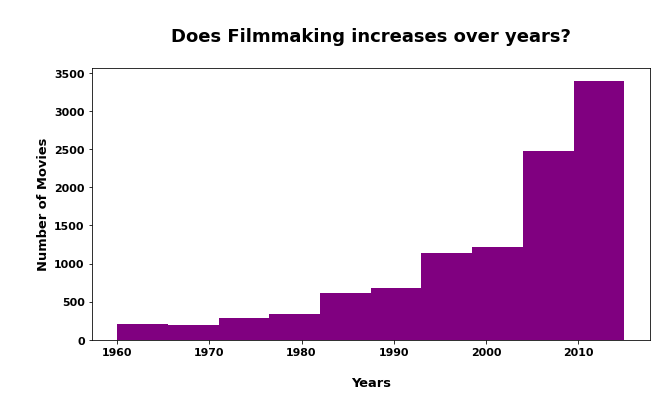

In [24]:
plt.subplots(figsize=(10,5));
plt.title('\nDoes Filmmaking increases over years?\n',fontsize=18,fontweight='bold');
plt.xlabel('\nYears'  , fontsize=13 ,fontweight='bold');
plt.ylabel('\n\nNumber of Movies'  , fontsize=13 ,fontweight='bold');
plt.xticks(fontsize=11 ,fontweight='bold');
plt.hist(data=df,x='release_year' , color='purple')
plt.yticks( fontsize=11 ,fontweight='bold');

__Over years, Number of movies produced gets higher.__

### Question 4: What are the top five directors that have highest ratings and popularity?

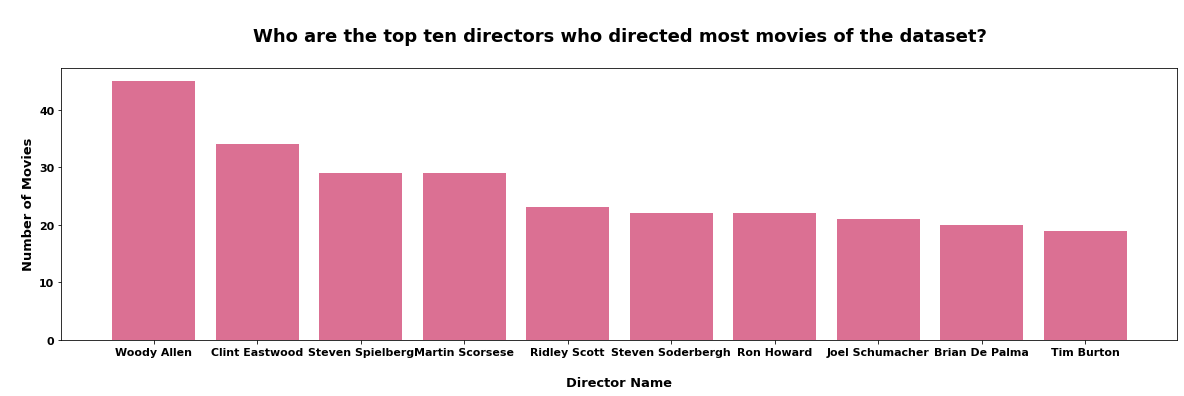

In [25]:
popular_directors=df.director.value_counts().nlargest(10)
plt.subplots(figsize=(20,5))
plt.bar(popular_directors.index , popular_directors.values , color='palevioletred');
plt.title('\nWho are the top ten directors who directed most movies of the dataset?\n',fontsize=18,fontweight='bold');
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.xlabel('\nDirector Name'  , fontsize=13 ,fontweight='bold');
plt.ylabel('\nNumber of Movies' , fontsize=13 ,fontweight='bold');

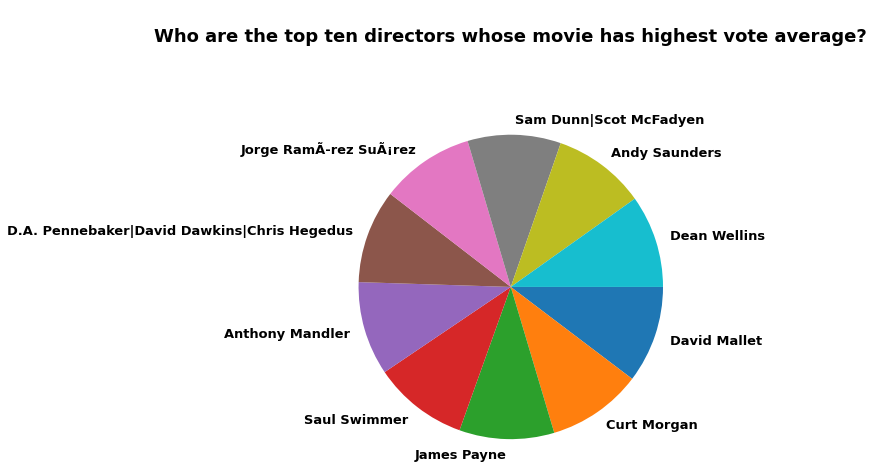

In [26]:
best_work=df.groupby('director')['vote_average'].mean().nlargest(10)
plt.subplots(figsize=(20,5))
plt.title('\nWho are the top ten directors whose movie has highest vote average?\n\n\n\n\n',fontsize=18,fontweight='bold');
plt.pie(best_work ,labels=best_work.index , radius=1.4,counterclock=False , textprops={'fontsize': 13 , 'fontweight' : 'bold'});
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');

### Question 5: What are the most popular five movies?

In [27]:
most_popular_movies=df['popularity'].nlargest(5).index.tolist()
labels=[];
for movie in most_popular_movies :
    labels.append(df.loc[df.index==movie , 'original_title'].iloc[0])

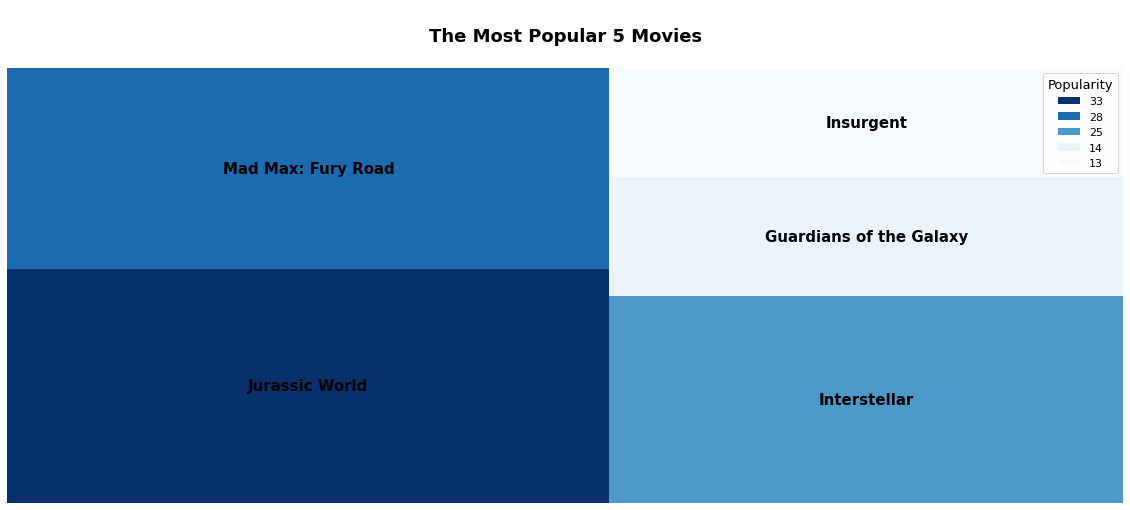

In [28]:
sizes=df['popularity'].nlargest(5).values.tolist()
cmap = matplotlib.cm.Blues
mini=min(sizes)
maxi=max(sizes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi);
colors = [cmap(norm(value)) for value in sizes]
plt.subplots(figsize=(20,8))
ax=squarify.plot(sizes=sizes,label=labels,color=colors ,  text_kwargs={'fontsize':15 , 'fontweight' : 'bold'});
plt.title('\nThe Most Popular 5 Movies\n' ,fontsize=18,fontweight='bold')
plt.axis('off');
legend_labels=[round(size) for size in sizes]
plt.legend(handles=ax.containers[0], labels=legend_labels , title='Popularity' , fontsize=11 ,title_fontsize=13 );

In [29]:
df.loc[df['original_title']=='Jurassic World']

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.986,150000000.000,1513528810.000,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524


__Most Popular Movies are shown in the treemap above at which Jurassic World is the most popular movie.__

__This movie was released in 2015 with budget of 138 Million dollars and revenue of about 1.4 Billion dollars both adjusted to 2010 dollar.__

### Question 6: What is the month at which movies are usually released?

In [30]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_month']=df['release_date'].dt.month_name()

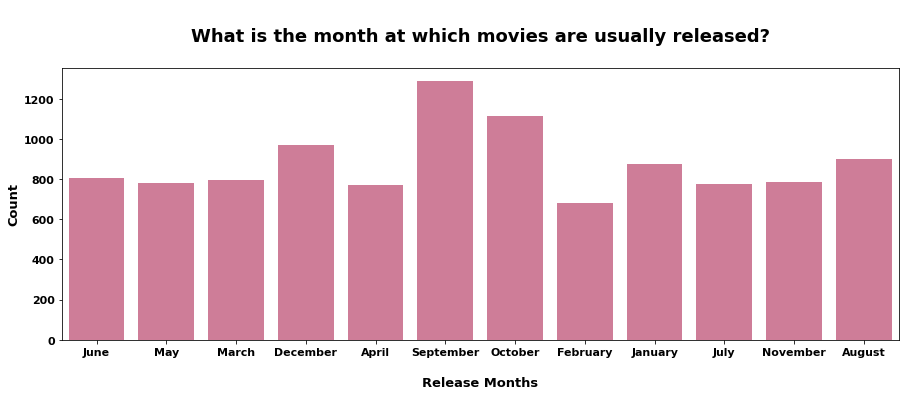

In [31]:
plt.subplots(figsize=(15,5));
plt.title('\nWhat is the month at which movies are usually released?\n',fontsize=18,fontweight='bold');
plt.xlabel('\nMonths'  , fontsize=13 ,fontweight='bold');
plt.ylabel('Count',fontsize=13 ,fontweight='bold');
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
sns.countplot(data=df, x='release_month', color='palevioletred').set(xlabel='\nRelease Months', ylabel='Count');

__Movies are usually released in September and October of each year.__

<a id='conclusions'></a>
## Conclusions


> __Higher popularity leads to higher vote counts.__

> __Top ten movie genres that has the highest revenue are :
Animation, Adventure, Fantasy, Family, Science Fiction, Action, War, Thriller, Comedy and Mystery.__

> __Over years,__ 
>> - __Revenue is increasing which means people spend more money on movies.__
>>- __Budget increase is an indication of higher interset in Filmmaking.__
>>- __The increase in vote counts ensures the higher interest in movies.__
>>- __Number of movies produced gets higher.__

> __Most Popular Movies are__
1. __'Jurassic World'__
1. __'Mad Max: Fury Road'__
1. __'Interstellar'__
1. __'Guardians of the Galaxy'__
1. __'Insurgent'__ 

> __Jurassic World as the most  popular movie was released in 2015 with budget of 138 Million dollars and revenue of about 1.4 Billion dollars both adjusted to 2010 dollar.__

> __The top ten directors whose movie has highest vote average are__
- 'David Mallet'
- 'Curt Morgan'
- 'James Payne'
- 'Saul Swimmer'
- 'Anthony Mandler'
- 'Andy Saunders'
- 'Dean Wellins'
- 'Sam Dunn|Scot McFadyen'
- 'D.A. Pennebaker|David Dawkins|Chris Hegedus'
- 'Jorge RamÃ­rez SuÃ¡rez'

> __The top ten directors who directed most movies of the dataset are__
- 'Woody Allen'
- 'Clint Eastwood'
- 'Martin Scorsese'
- 'Steven Spielberg'
- 'Ridley Scott'
- 'Ron Howard'
- 'Steven Soderbergh'
- 'Joel Schumacher'
- 'Brian De Palma'
- 'Wes Craven'

> __Movies are usually released in September and October of each year.__


### Limitaions
- There are a lot of missing values so revenue and budget analysis isn't 100% accurate.
- The data has many TV Series and this might affect the results that was supposed to be for movies.

### Resources
- https://matplotlib.org/3.1.0/gallery/color/named_colors.html
- https://www.ibm.com/support/knowledgecenter/en/SSGNPV_2.0.0/dsx/markd-jupyter.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html
- https://www.askpython.com/python/examples/plot-a-treemap-in-python